In [1]:
from pathlib import Path
import random
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pyfaidx import Fasta
from meth5 import MetH5File
import pandas as pd

from bayes_opt import BayesianOptimization
from pomegranate import NormalDistribution, BetaDistribution, GeneralMixtureModel

from nanoepitools.plotting.general_plotting import PlotArchiver, plot_2d_density
from nanoepitools.math import llr_to_p, p_to_llr
from benchmark_pycometh.config import module_config
from benchmark_pycometh.simulation.nanopolish_simulator import OmicsSimlaLoader

pa = PlotArchiver("meth5", headless=False, config={"plot_archive_dir": "/home/r933r/snajder/nanoepitools_plots/benchmark"})

mf = MetH5File(module_config.meth5_template_file.format(sample="HG002"), "r")

In [ ]:
chunk_lens = list(get_all_chunk_lengths(mf))

In [37]:
chrom="20"
chrom_container = mf[chrom]

In [15]:
cov, cov_pos = chrom_container.get_all_values().get_llr_site_aggregate(len)
density = np.zeros(cov_pos[-1, 0])
for c, p in zip(cov, cov_pos):
    density[int(p[0]):int(p[1])] += c
density_conv = np.convolve(density, np.ones(1000), mode="same")

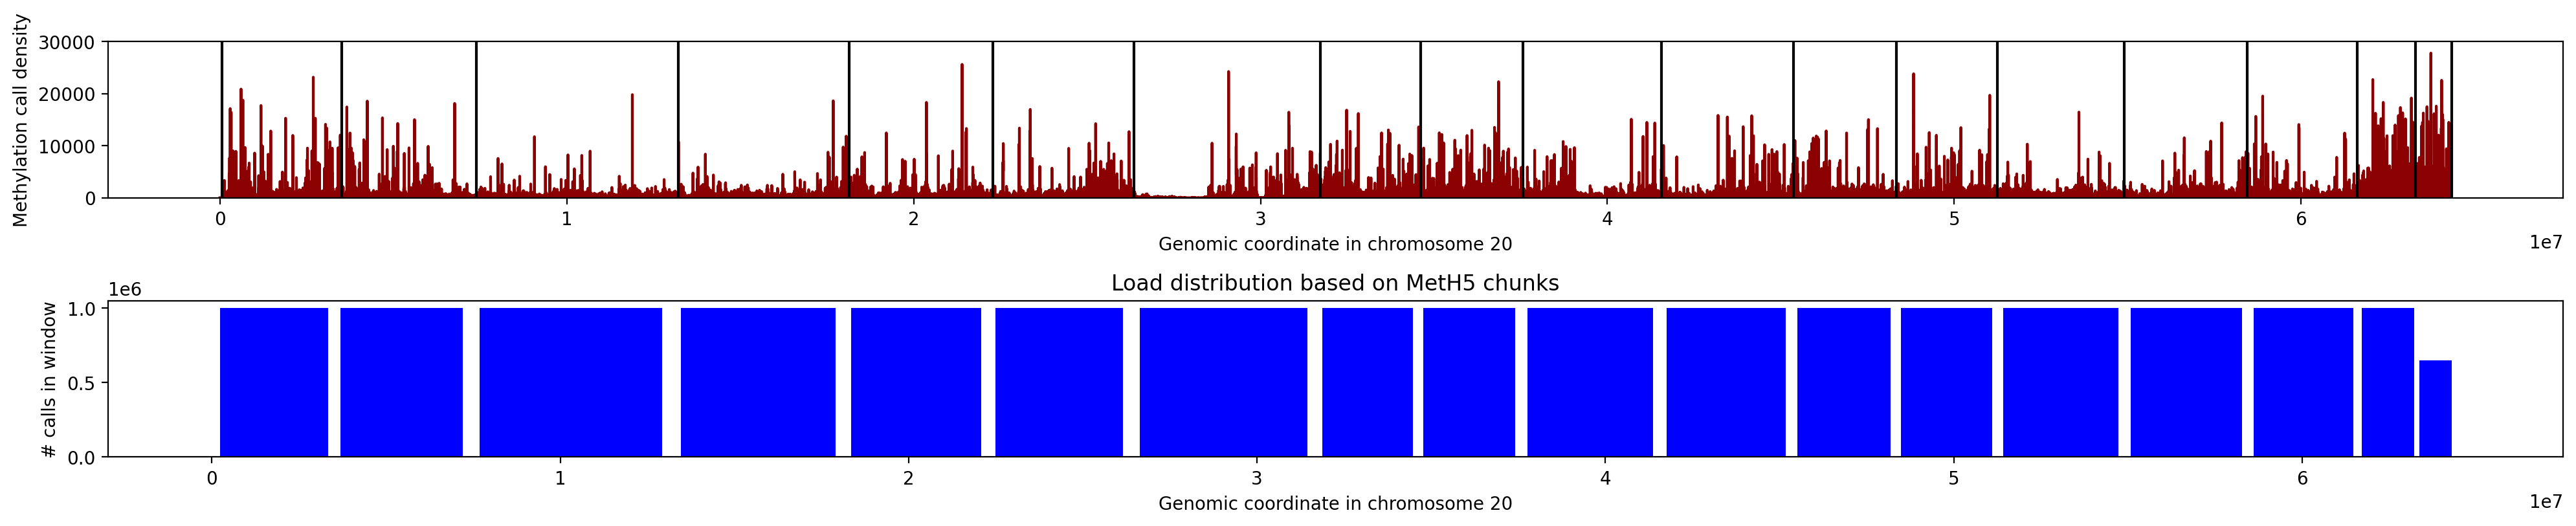

In [42]:
fig, (ax1, ax2) = pa.subplots(2,1,figsize=(20,4))
plt.title("Load distribution based on MetH5 chunks")
ax1.plot(np.arange(len(density_conv))[::1000], density_conv[::1000], c="darkred")
h = 30000
ax1.set_ylim(0,h)
for i in range(chrom_container.get_number_of_chunks()):
    vals = chrom_container.get_chunk(i, overlap=True)
    width = (vals.get_ranges()[-1,1] - vals.get_ranges()[0,0])
    mid = (vals.get_ranges()[0,0] + width//2)
    ax2.bar(mid, vals.end-vals.start, width=width*0.9, color="blue")
    ax1.vlines(vals.get_ranges()[0,0], 0, h, color="k")
ax1.set_ylabel("Methylation call density")
ax1.set_xlabel(f"Genomic coordinate in chromosome {chrom}")
ax2.set_ylabel(f"# calls in window")
ax2.set_xlabel(f"Genomic coordinate in chromosome {chrom}")
ax1.vlines(vals.get_ranges()[-1,1], 0, h, color="k")
pa.saveandshow("load_distribution_chunked")

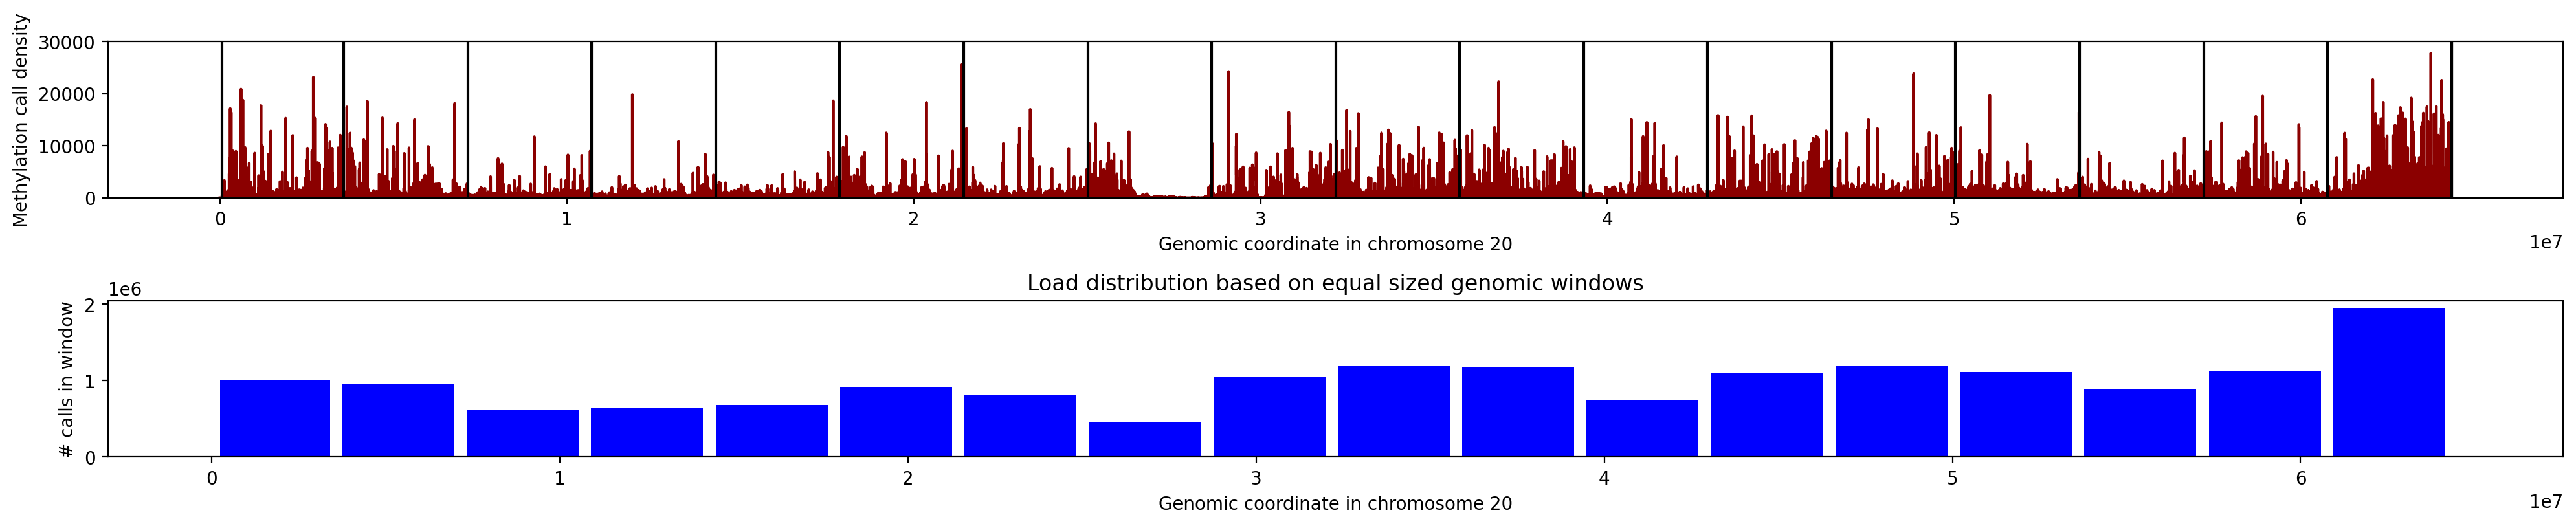

In [43]:
fig, (ax1, ax2) = pa.subplots(2,1,figsize=(20,4))
plt.title("Load distribution based on equal sized genomic windows")
ax1.plot(np.arange(len(density_conv))[::1000], density_conv[::1000], c="darkred")
h = 30000
ax1.set_ylim(0,h)
chrom_len = chrom_container.get_chunk(chrom_container.get_number_of_chunks()-1).get_ranges()[-1,1]
window_size = chrom_len // chrom_container.get_number_of_chunks()
for i in range(0, chrom_len, window_size):
    vals = chrom_container.get_values_in_range(i, i + window_size)
    width = (vals.get_ranges()[-1,1] - vals.get_ranges()[0,0])
    mid = (vals.get_ranges()[0,0] + width//2)
    ax2.bar(mid, vals.end-vals.start, width=width*0.9, color="blue")
    ax1.vlines(vals.get_ranges()[0,0], 0, h, color="k")
ax1.set_ylabel("Methylation call density")
ax1.set_xlabel(f"Genomic coordinate in chromosome {chrom}")
ax2.set_ylabel(f"# calls in window")
ax2.set_xlabel(f"Genomic coordinate in chromosome {chrom}")
ax1.vlines(vals.get_ranges()[-1,1], 0, h, color="k")
pa.saveandshow("load_distribution_windowed")

In [107]:
cov_pos.shape

(1239250, 2)

In [ ]:
density_conv.shape